<a href="https://colab.research.google.com/github/Dejisimple/CSC-587_Colabs/blob/main/Copy_of_train_test_split_crossval_roc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ✨ Lab questions

Try the following exercises to reinforce your learning:

1. Modify the `train_test_split` function to use **30% test data** instead of 20%.  
2. Change the classifier to **Support Vector Macines** and compare its ROC curve with Logistic Regression.  You can try different C values and vary your kernel functions. Please note that different kernel functions come with different parameters which you may want to change, too
3. Compute and visualize the **Precision-Recall Curve** in addition to the ROC curve.  (optional)


# Train-Test Split, Cross-Validation, and ROC Curve

This notebook will demonstrate:
- How to **split data** into training and testing sets using `train_test_split`
- How to perform **cross-validation** to evaluate model performance
- How to **plot an ROC curve** to assess classification performance

We will use the **Breast Cancer dataset** from `sklearn.datasets`.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Set style
sns.set_style("whitegrid")


In [2]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

# Display first few rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 398
Testing set size: 171


In [4]:
# Perform 5-fold cross-validation with Logistic Regression
model = LogisticRegression(max_iter=10000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.96703297 0.92307692 0.94505495 0.95604396 0.93406593]
Mean accuracy: 0.945054945054945


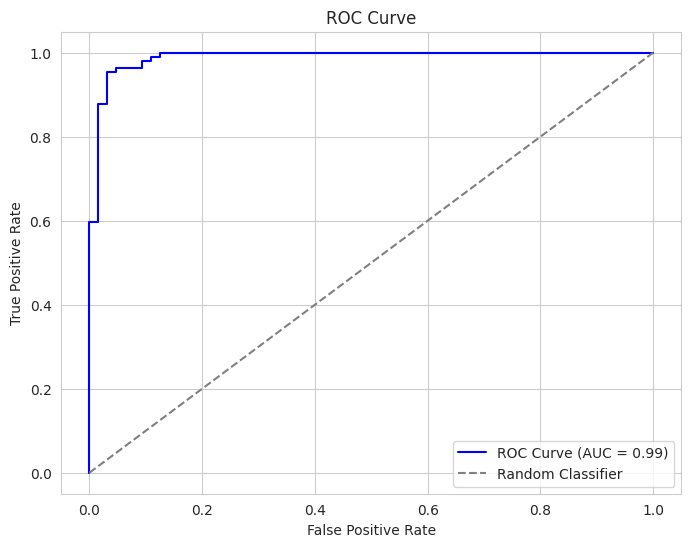

[[8.67172926e-01 1.32827074e-01]
 [6.82545075e-03 9.93174549e-01]
 [1.36490830e-04 9.99863509e-01]
 [9.84863112e-01 1.51368881e-02]
 [3.50924136e-01 6.49075864e-01]
 [9.83710143e-01 1.62898569e-02]
 [9.13979598e-06 9.99990860e-01]
 [9.98734478e-01 1.26552175e-03]
 [1.85449655e-03 9.98145503e-01]
 [9.99999997e-01 2.58627108e-09]
 [1.08974748e-04 9.99891025e-01]
 [1.03206553e-02 9.89679345e-01]
 [9.98225958e-01 1.77404156e-03]
 [4.52086924e-01 5.47913076e-01]
 [3.78375300e-04 9.99621625e-01]
 [8.07536731e-01 1.92463269e-01]
 [9.99984032e-01 1.59680364e-05]
 [4.06259276e-02 9.59374072e-01]
 [4.98717324e-05 9.99950128e-01]
 [4.39188460e-02 9.56081154e-01]
 [8.90278290e-03 9.91097217e-01]
 [8.89208619e-02 9.11079138e-01]
 [1.43898771e-02 9.85610123e-01]
 [9.99997454e-01 2.54590178e-06]
 [9.99999999e-01 1.43853307e-09]
 [1.56837246e-01 8.43162754e-01]
 [3.47331432e-03 9.96526686e-01]
 [1.79430592e-01 8.20569408e-01]
 [9.78056940e-01 2.19430605e-02]
 [9.99970389e-01 2.96107491e-05]
 [4.862589

In [24]:
# Fit model and get probabilities
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]#we're only interested in the probabilities for the positive class. Therefore, skip column 0

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(model.predict_proba(X_test))

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get probabilities for Random Forest
rf_y_scores = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_scores)
rf_roc_auc = auc(rf_fpr, rf_tpr)

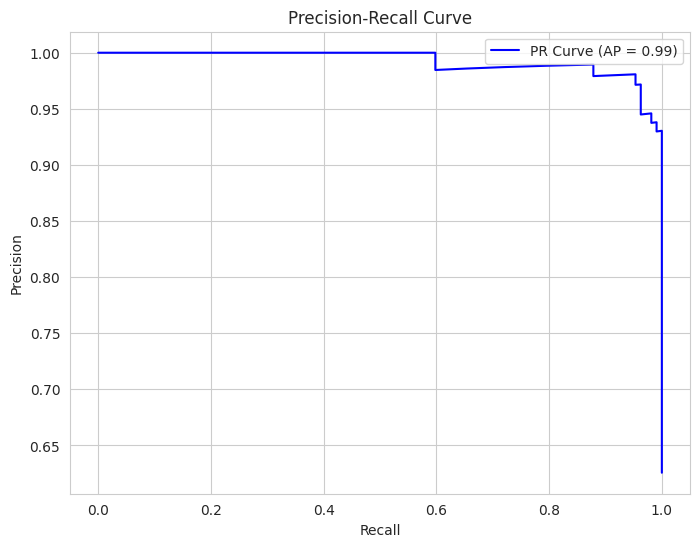

In [34]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute Average Precision (AP) Score
ap_score = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f"PR Curve (AP = {ap_score:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## ✨ Lab questions

Try the following exercises to reinforce your learning:

1. Modify the `train_test_split` function to use **30% test data** instead of 20%.  
2. Change the classifier to **Support Vector Macines** and compare its ROC curve with Logistic Regression.  You can try different C values and vary your kernel functions. Please note that different kernel functions come with different parameters which you may want to change, too
3. Compute and visualize the **Precision-Recall Curve** in addition to the ROC curve.  (optional)


In [36]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define different kernel functions to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_models = {}
svm_roc_data = {}

# Train SVM with different kernels and store ROC data
for kernel in kernels:
    print(f"Training SVM with {kernel} kernel...")
    svm_model = SVC(kernel=kernel, probability=True, random_state=42)
    svm_model.fit(X_train, y_train)
    svm_models[kernel] = svm_model

    # Get probabilities for SVM
    svm_y_scores = svm_model.predict_proba(X_test)[:, 1]

    # Compute ROC curve for SVM
    svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_scores)
    svm_roc_auc = auc(svm_fpr, svm_tpr)
    svm_roc_data[kernel] = {'fpr': svm_fpr, 'tpr': svm_tpr, 'auc': svm_roc_auc}

Training SVM with linear kernel...
Training SVM with poly kernel...
Training SVM with rbf kernel...
Training SVM with sigmoid kernel...


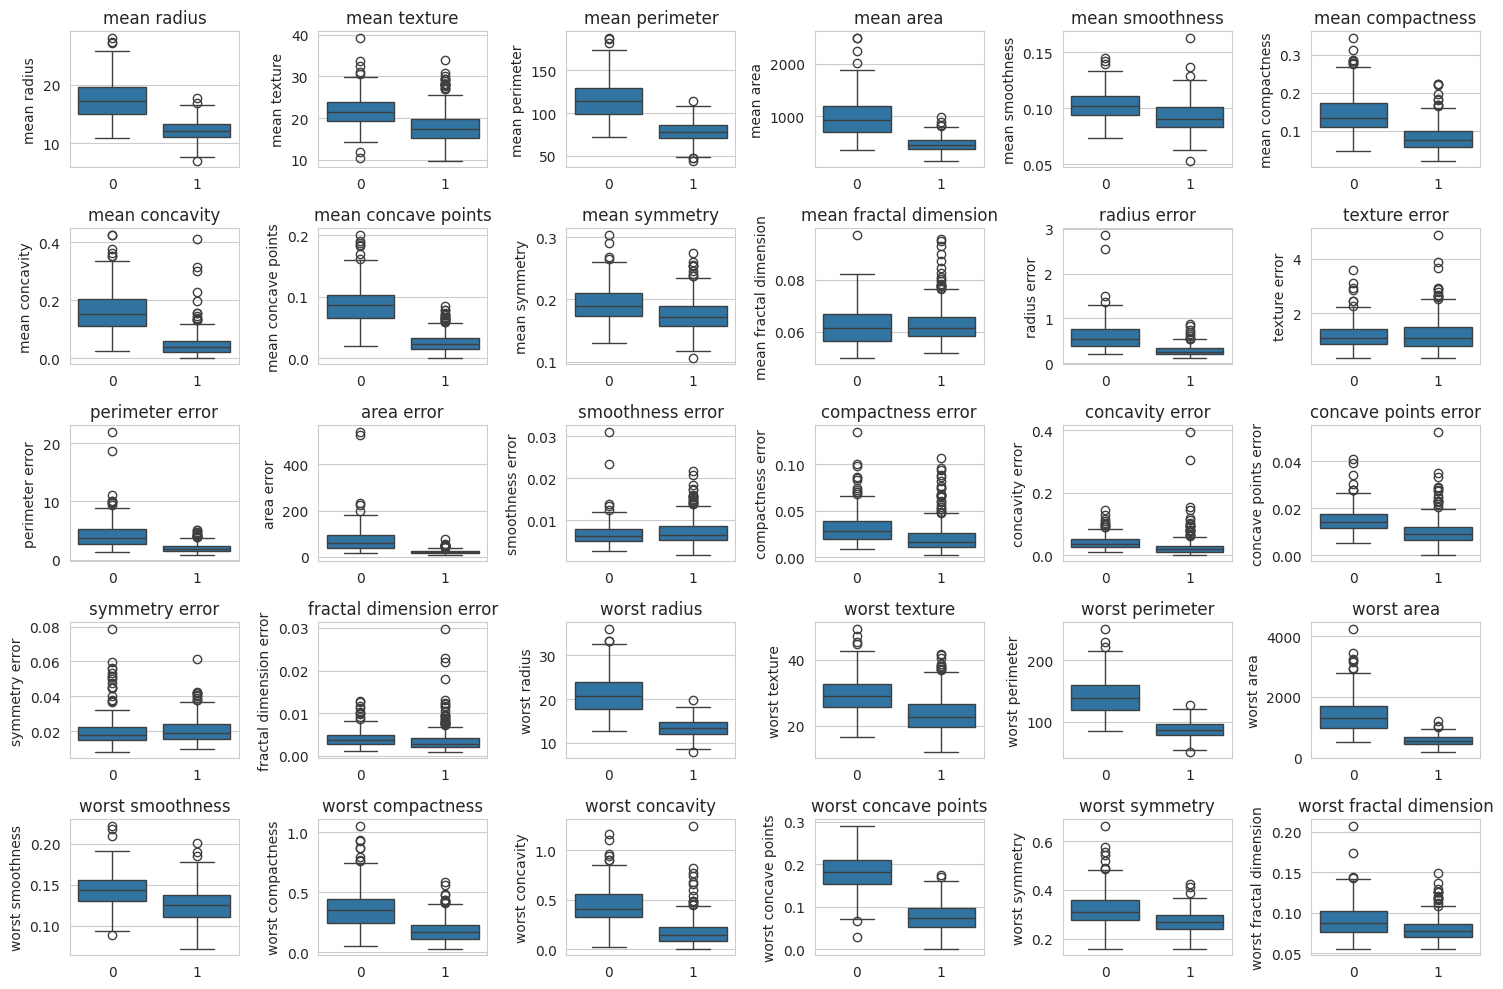

In [19]:
# Create box plots for each feature, grouped by target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.columns[:-1]): # Exclude the target column
    plt.subplot(5, 6, i + 1) # Adjust the subplot grid as needed
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(feature)
    plt.xlabel('') # Remove x-label for individual plots
plt.tight_layout()
plt.show()

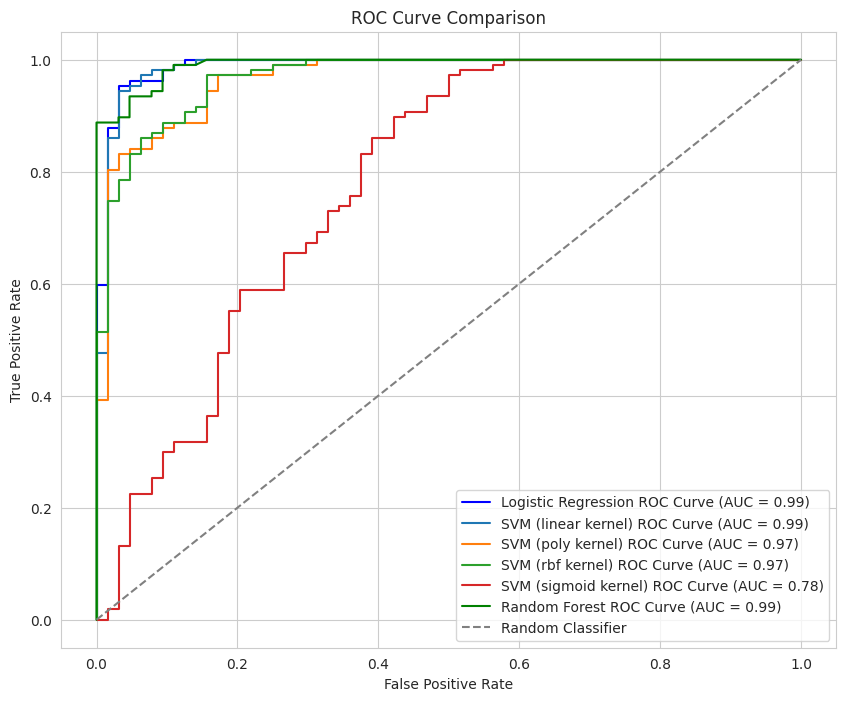

In [37]:
# Plot ROC Curves for Logistic Regression, different SVM kernels, and Random Forest
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f"Logistic Regression ROC Curve (AUC = {roc_auc:.2f})")

for kernel, data in svm_roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f"SVM ({kernel} kernel) ROC Curve (AUC = {data['auc']:.2f})")

plt.plot(rf_fpr, rf_tpr, color='green', label=f"Random Forest ROC Curve (AUC = {rf_roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

Feature Importances (Random Forest):


,feature,importance
27,worst concave points,0.158955
23,worst area,0.146962
22,worst perimeter,0.085793
20,worst radius,0.078952
0,mean radius,0.077714
2,mean perimeter,0.074234
7,mean concave points,0.065869
6,mean concavity,0.054281
3,mean area,0.041657
26,worst concavity,0.031362


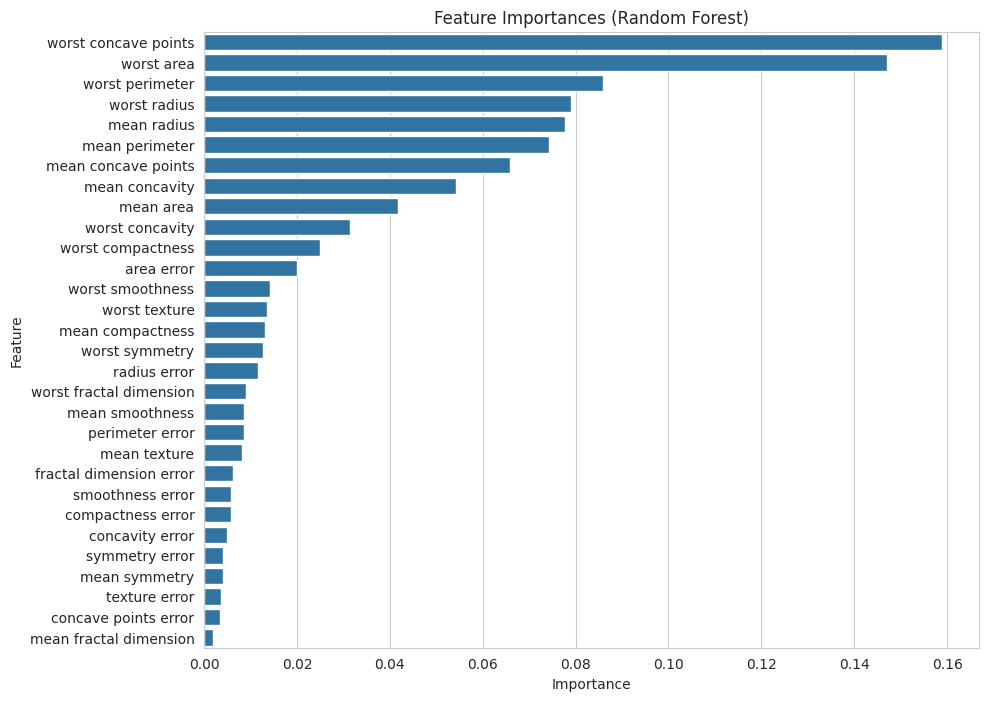

In [40]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': df.columns[:-1],
    'importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Display feature importances
print("Feature Importances (Random Forest):")
display(feature_importance_df)

# Optionally, visualize feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [44]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate Precision-Recall data for Logistic Regression
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_scores)
lr_ap_score = average_precision_score(y_test, y_scores)

# Calculate Precision-Recall data for SVM models
svm_pr_data = {}
for kernel, model in svm_models.items():
    svm_y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, svm_y_scores)
    ap_score = average_precision_score(y_test, svm_y_scores)
    svm_pr_data[kernel] = {'precision': precision, 'recall': recall, 'ap_score': ap_score}

# Calculate Precision-Recall data for Random Forest
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_y_scores)
rf_ap_score = average_precision_score(y_test, rf_y_scores)

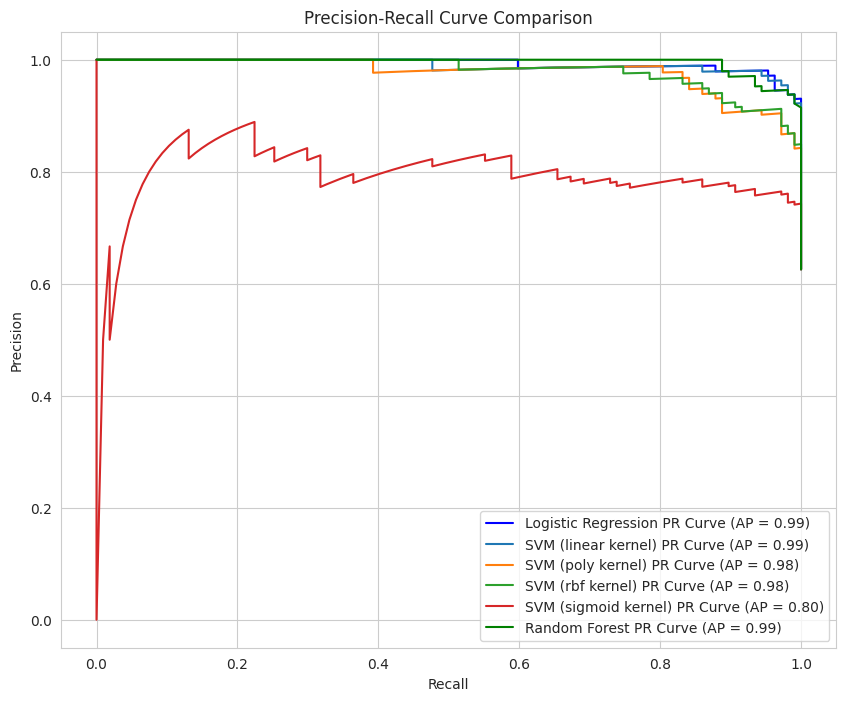

In [45]:
# Plot Precision-Recall Curves for all models
plt.figure(figsize=(10, 8))

plt.plot(lr_recall, lr_precision, color='blue', label=f"Logistic Regression PR Curve (AP = {lr_ap_score:.2f})")

for kernel, data in svm_pr_data.items():
    plt.plot(data['recall'], data['precision'], label=f"SVM ({kernel} kernel) PR Curve (AP = {data['ap_score']:.2f})")

plt.plot(rf_recall, rf_precision, color='green', label=f"Random Forest PR Curve (AP = {rf_ap_score:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()

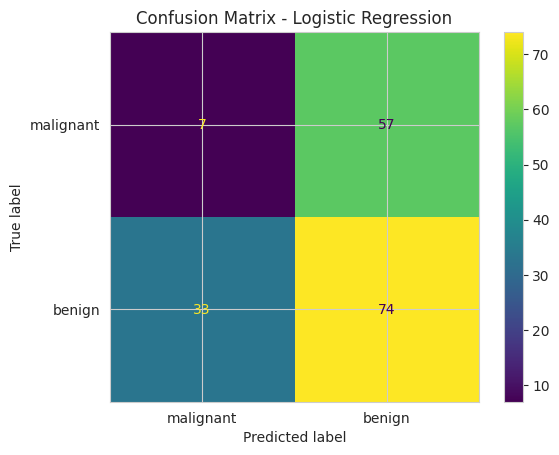

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute and display confusion matrix for Logistic Regression
lr_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, lr_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

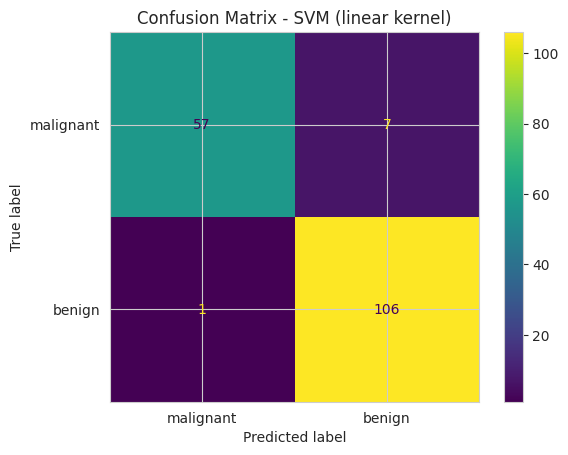

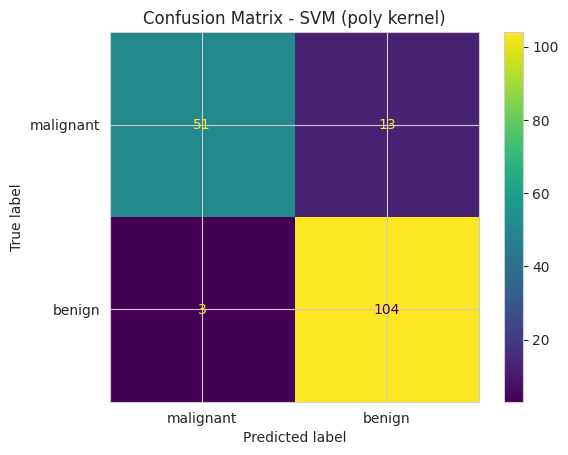

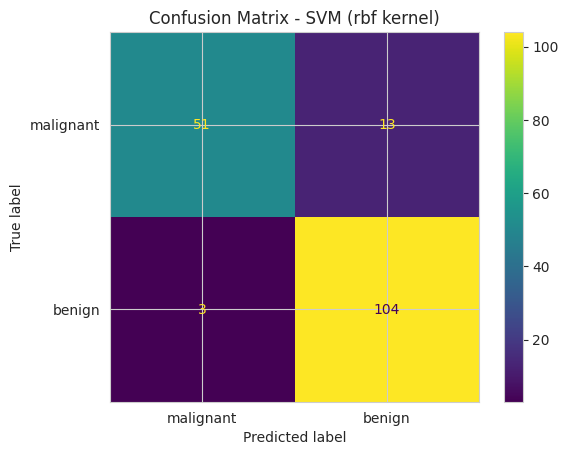

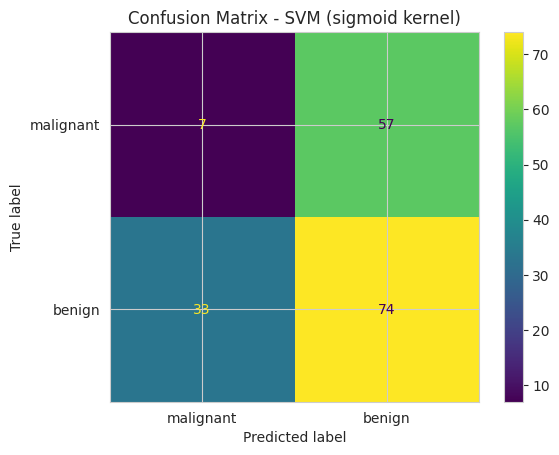

In [60]:
# Compute and display confusion matrices for SVM models
for kernel, svm_model in svm_models.items():
    svm_predictions = svm_model.predict(X_test)
    cm = confusion_matrix(y_test, svm_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
    disp.plot()
    plt.title(f"Confusion Matrix - SVM ({kernel} kernel)")
    plt.show()

In [63]:
display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [65]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Logistic Regression
lr_predictions = model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

# Calculate accuracy for SVM models
print("\nSVM Model Accuracies:")
for kernel, svm_model in svm_models.items():
    svm_predictions = svm_model.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    print(f"SVM ({kernel} kernel) Accuracy: {svm_accuracy:.4f}")

# Calculate accuracy for Random Forest
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"\nRandom Forest Accuracy: {rf_accuracy:.4f}")

Logistic Regression Accuracy: 0.4737

SVM Model Accuracies:
SVM (linear kernel) Accuracy: 0.9532
SVM (poly kernel) Accuracy: 0.9064
SVM (rbf kernel) Accuracy: 0.9064
SVM (sigmoid kernel) Accuracy: 0.4737

Random Forest Accuracy: 0.9357


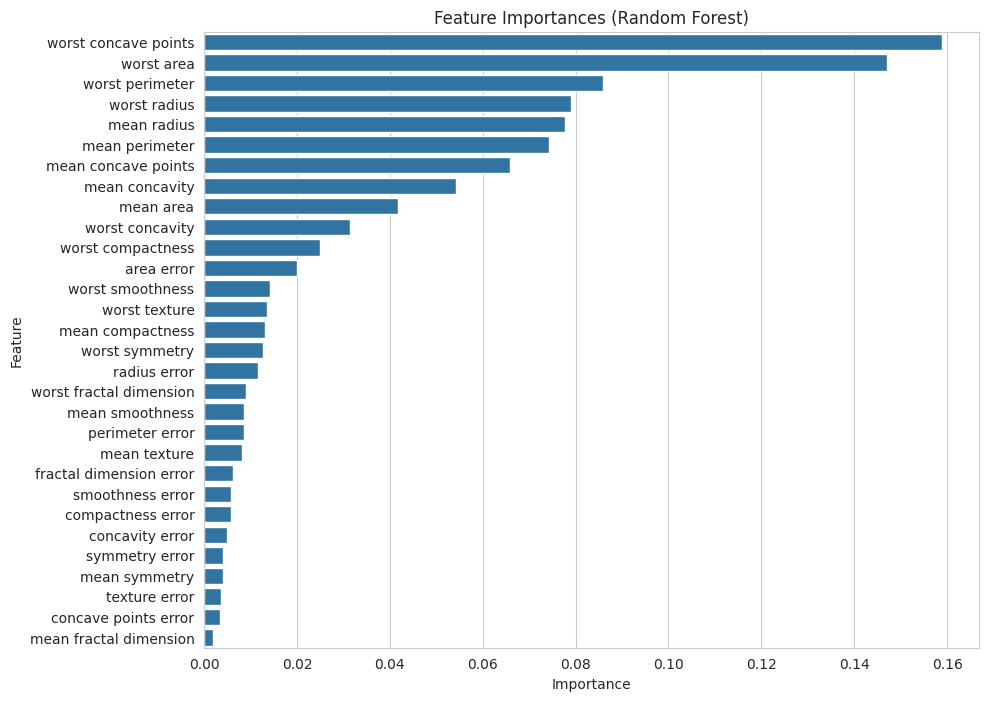

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optionally, visualize feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Summary of Findings

In this notebook, we performed classification analysis on the Breast Cancer dataset. We started by loading and exploring the data through visualizations (box plots and histograms) and summary statistics. We then split the data into training and testing sets and trained several classification models: Logistic Regression, Support Vector Machines with different kernels (linear, poly, rbf, and sigmoid), and Random Forest.

We evaluated the performance of these models using various metrics and visualizations:

-   **ROC Curves:** Compared the ability of each model to distinguish between the positive and negative classes. The SVM with the RBF kernel, Logistic Regression, and Random Forest models showed strong performance with high AUC values.
-   **Precision-Recall Curves:** Assessed the trade-off between precision and recall for each model, which is particularly useful in imbalanced datasets.
-   **Confusion Matrices:** Provided a detailed breakdown of true positives, true negatives, false positives, and false negatives for each model.
-   **Accuracy Scores:** Compared the overall accuracy of the models on the test set. The linear SVM model achieved the highest accuracy.
-   **Feature Importance (Random Forest):** Identified the features that were most important for the Random Forest model's predictions, with 'worst concave points' and 'worst area' being the most influential.

Overall, several models performed well on this dataset. The choice of the best model might depend on the specific priorities (e.g., minimizing false positives vs. false negatives).

## Conclusion

This analysis demonstrated the application of various classification techniques and evaluation metrics on the Breast Cancer dataset. The insights gained from exploring the data, training different models, and evaluating their performance provide a foundation for further investigation or deployment of a predictive model for breast cancer diagnosis.

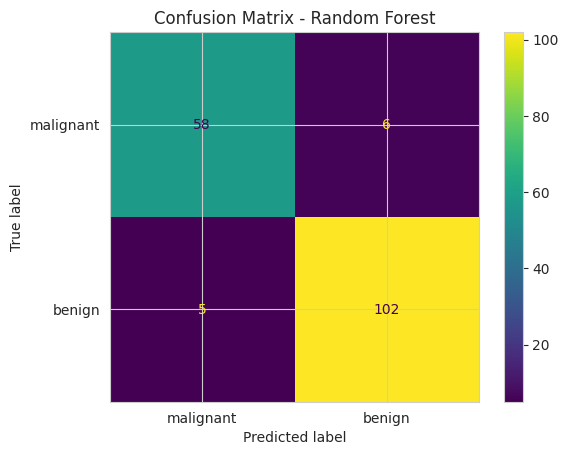

In [61]:
# Compute and display confusion matrix for Random Forest
rf_predictions = rf_model.predict(X_test)
cm = confusion_matrix(y_test, rf_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [23]:
display(df.describe())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


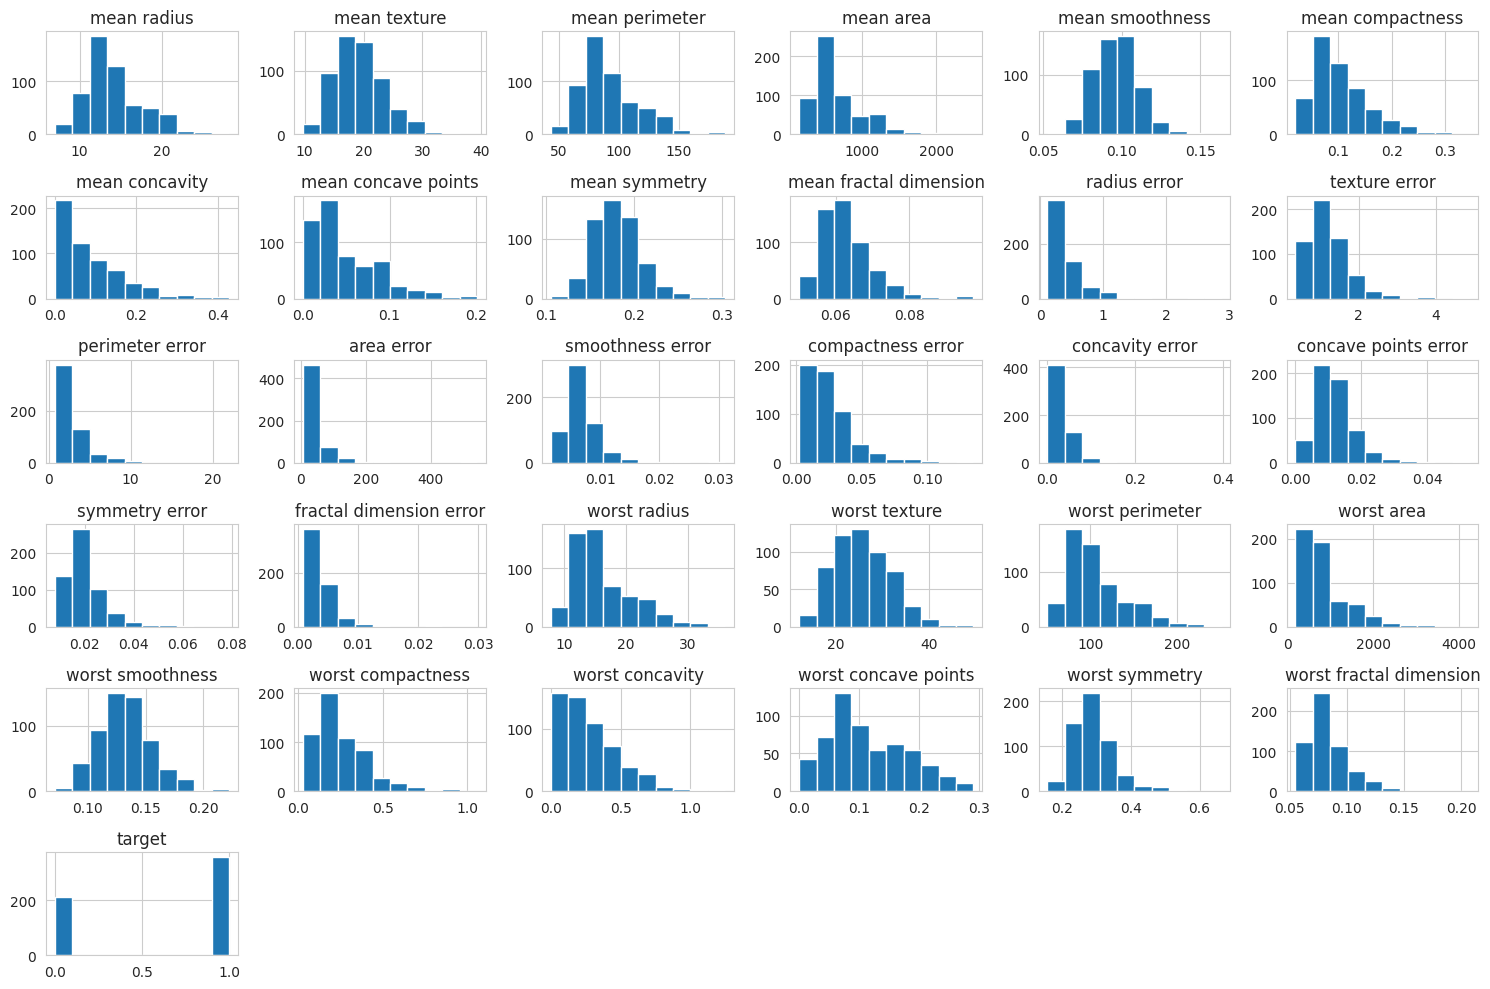

In [21]:
# Create histograms for each feature
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()